# Exploring the Housing dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',header=None,sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


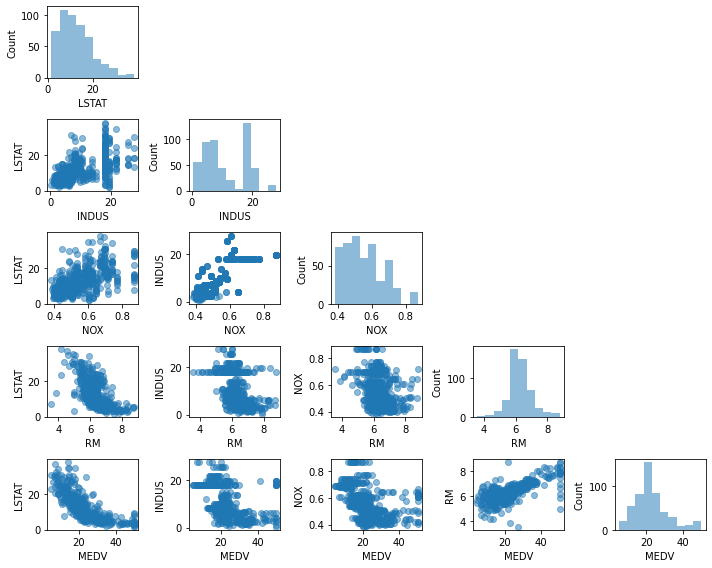

In [4]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

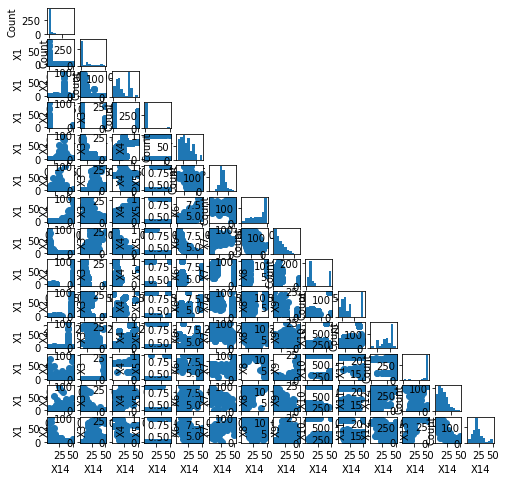

In [9]:
# Plot all features

scatterplotmatrix(df.values)

plt.show()

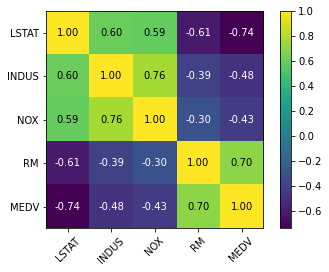

In [10]:
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)

hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [12]:
from LinearRegressionGD import LinearRegressionGD

X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

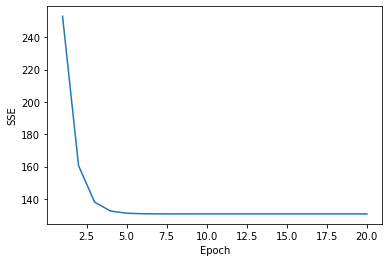

In [13]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)

plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [14]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

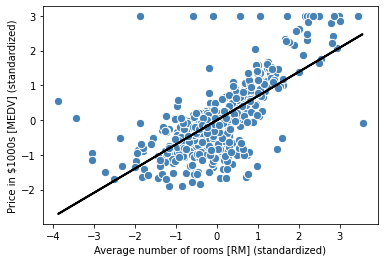

In [15]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [19]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
#print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

In [20]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [21]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)

print('Slope: %.3f' % slr.coef_[0])

print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


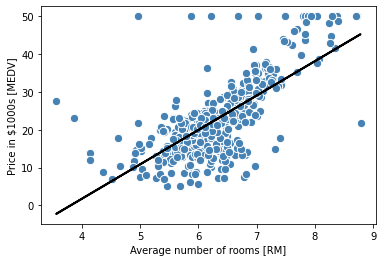

In [22]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [23]:
# Analytical solutions of linear regression - closed form solution - guarantees finding the optimal solution
# adding a column vector of "ones"

Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


# Fitting a robust regression model using RANSAC

In [25]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

ransac.fit(X,y)

/home/lunet/ttrmc/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

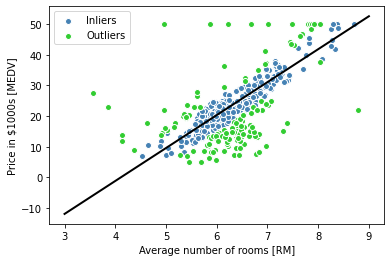

In [26]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
           c='steelblue', edgecolor='white',
           marker='o', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask],
           c='limegreen', edgecolor='white',
           marker='o', label='Outliers')

plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [27]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


# Evaluating the performance of linear regression models

In [28]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

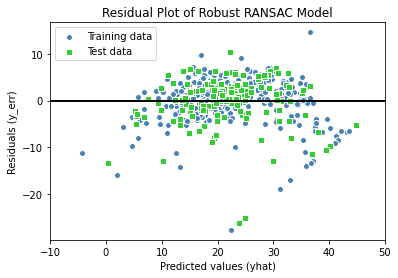

In [31]:
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test data')

plt.xlabel('Predicted values (yhat)')
plt.ylabel('Residuals (y_err)')
plt.legend(loc='upper left')
plt.title('Residual Plot of Robust RANSAC Model')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' %(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [33]:
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' %
     (r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


# Using regularized methods for regression

## Ridge Regression

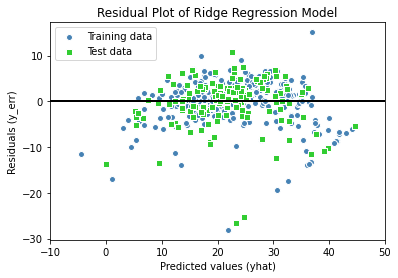

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

ridge_y_train_pred = ridge.predict(X_train)
ridge_y_test_pred = ridge.predict(X_test)

plt.scatter(ridge_y_train_pred, ridge_y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training data')

plt.scatter(ridge_y_test_pred, ridge_y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test data')

plt.xlabel('Predicted values (yhat)')
plt.ylabel('Residuals (y_err)')
plt.legend(loc='upper left')
plt.title('Residual Plot of Ridge Regression Model')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

## Lasso Regression

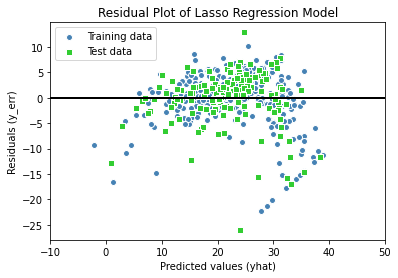

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)

lasso.fit(X_train, y_train)

lasso_y_train_pred = lasso.predict(X_train)
lasso_y_test_pred = lasso.predict(X_test)

plt.scatter(lasso_y_train_pred, lasso_y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training data')

plt.scatter(lasso_y_test_pred, lasso_y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test data')

plt.xlabel('Predicted values (yhat)')
plt.ylabel('Residuals (y_err)')
plt.legend(loc='upper left')
plt.title('Residual Plot of Lasso Regression Model')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

## ElasticNet Regression

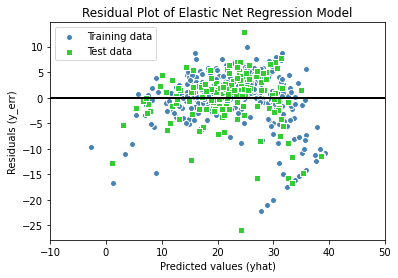

In [37]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

elanet.fit(X_train, y_train)

elanet_y_train_pred = elanet.predict(X_train)
elanet_y_test_pred = elanet.predict(X_test)

plt.scatter(elanet_y_train_pred, elanet_y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training data')

plt.scatter(elanet_y_test_pred, elanet_y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test data')

plt.xlabel('Predicted values (yhat)')
plt.ylabel('Residuals (y_err)')
plt.legend(loc='upper left')
plt.title('Residual Plot of Elastic Net Regression Model')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

# Modeling nonlinear relationships in the Housing dataset

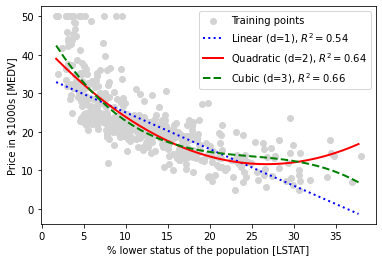

In [41]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results

plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
        label='Linear (d=1), $R^2=%.2f$' % linear_r2,
        color='blue',
        lw=2,
        linestyle=':')

plt.plot(X_fit, y_quad_fit,
        label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
        color='red',
        lw=2,
        linestyle='-')

plt.plot(X_fit, y_cubic_fit,
        label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
        color='green',
        lw=2,
        linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

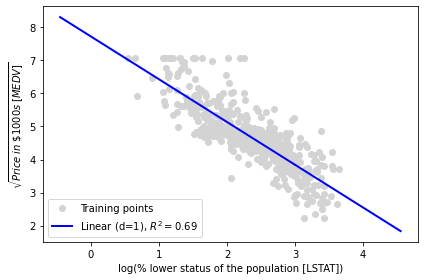

In [42]:
# log-transform the data
# transform features

X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1,X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt,
           label='Training points',
           color='lightgray')

plt.plot(X_fit, y_lin_fit,
        label='Linear (d=1), $R^2=%.2f$' % linear_r2,
        color='blue',
        lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()